In [22]:
import pycbc
import os
from matplotlib import pyplot as plt 
from pycbc.inference.io import loadfile 
import numpy as np 
import statistics 
%matplotlib inline

In [23]:
!ls -tr

gw150914_h1_chirp.wav
GW150914_m1_m2_Normal_IMRPhenomXHM.png
GW150914_m1_m2_Normal_NRSur7dq4.png
GW150914_mchirp_Uniform_IMRPhenomXHM.png
GW150914_UniformPriors_Bug.py
GW150914_M1_M2_Uniform_IMRPhenomXHM_reduced_limits.png
GW150914_M1_M2_Uniform_IMRPhenomXHM.png
GW150914_Uniform_Priors:_5_Highest_Log_Likelihood.png
GW150914_mchirp_q_Uniform_IMRPhenomXHM.png
GW150914_chirpmass_uniform_IMRPhenomXHM.png
GW150914_mchirp_q_Uniform_IMRPhenomXHM_distance_varied.png
GW150914_chirpmass_uniform_IMRPhenomXHM_dist_varied.png
GW150914_mchirp_q_Uniform_IMRPhenomXHM_distance_at800.png
GW150914_Distance_Unifrom_Priors_phenom.png
GW150914_chirpmass_uniform_IMRPhenomXHM_dist_at800.png
GW150914_mchirp_q_Uniform_IMRPhenomXPHM_distance_at800.png
GW150914_Distance_Unifrom_Priors_phenom_IMRPhenomXPHM.png
GW150914_chirpmass_uniform_IMRPhenomXPHM_dist_at800.png
GW150914_Test.ipynb
inference.hdf
GW150914_Data_From_Cluster.ipynb
GW150914_posteriors_all_mass_NRSur7dq4.png
GW150914_source_masses.png
inference_reds

In [24]:
nrsur = loadfile('ALL_mass_spin_posteriors_gw150914_NRSur7dq4_newrun.hdf', 'r') 
xphm = loadfile('ALL_mass_spin_posteriors_gw150914_IMRPhenomXPHM_newrun.hdf', 'r') 
pv2 = loadfile('ALL_mass_spin_posteriors_gw150914_IMRPheomPv2_newrun.hdf', 'r')

In [25]:
xphm_samples = nrsur.read_samples(nrsur['samples'].keys(), temps=0) 
nrsur_samples = xphm.read_samples(xphm['samples'].keys(), temps=0)  
pv2_samples = pv2.read_samples(pv2['samples'].keys(),temps=0) 

In [26]:
nrsur_samples

rec.array([(32.55489422, 1.24979606, -341352.10805064, 0.05881648, 5.4207116 , 2.11798961, -1.15490953, 4.39614442, 1.59947229, 29.64918568, 27.0404342 , -20.50894668, 0.23687758, 0., 1.90561016, 0.72955855, -0.00268215, 550.25407857, 1.90927136, 0.11465178),
           (33.48570888, 1.96133704, -341349.19462958, 0.29260528, 4.2563609 , 3.38679962, -0.95520803, 0.83494677, 3.98081775, 31.13260791, 28.1043711 , -19.50648419, 2.31656631, 0., 1.38498744, 0.26491049, -0.00714093, 453.68810843, 2.64198579, 0.09571807),
           (38.93134686, 1.01619995, -341347.53515946, 0.32108814, 6.13968284, 0.96204591, -1.24304641, 1.66804038, 4.02958219, 26.01394176, 27.59267624, -21.98763963, 2.98367041, 0., 2.55473464, 0.39877952, -0.00546626, 606.14306407, 2.16061871, 0.12542212),
           ...,
           (33.57627747, 1.97555608, -341348.20569769, 0.31177497, 3.00752089, 0.57381081, -1.13390344, 3.93159109, 0.26631405, 28.32588541, 26.82800995, -20.24936159, 2.64366014, 0., 0.76745514, 0.049023

In [27]:
len(pv2_samples) == len(xphm_samples) == len(nrsur_samples) 
print(len(pv2_samples))
print(len(xphm_samples)) 
print(len(nrsur_samples))

1400
1400
1400


In [28]:
mass1_xphm = xphm_samples['srcmass1']
mass2_xphm = xphm_samples['srcmass2']

mass1_nrsur = nrsur_samples['srcmass1']
mass2_nrsur = nrsur_samples['srcmass2'] 

mass1_pv2 = pv2_samples['srcmass1'] 
mass2_pv2 = pv2_samples['srcmass2'] 

mass1 = np.append(mass1_xphm,mass1_nrsur) 
mass1 = np.append(mass1,mass1_pv2) 

mass2 = np.append(mass2_xphm,mass2_nrsur) 
mass2 = np.append(mass2,mass2_pv2)
np.median(mass1_xphm) 
len(mass1)

4200

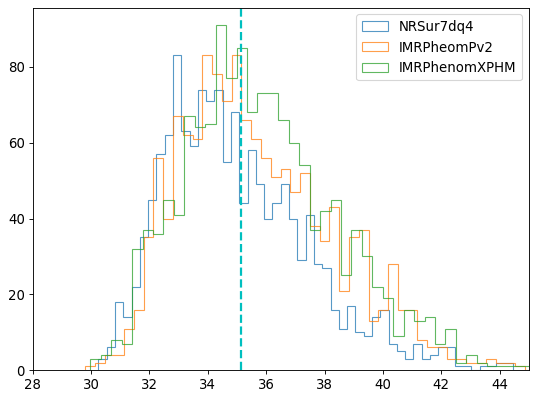

In [33]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

plt.hist(mass1_nrsur,bins = 50,alpha = 0.75,label = 'NRSur7dq4',histtype='step', stacked=True, fill=False)  
plt.hist(mass1_pv2,bins = 50,alpha = 0.75,histtype='step', stacked=True, fill=False, label='IMRPheomPv2') 
plt.hist(mass1_xphm, bins = 50,alpha = 0.75,histtype='step', stacked=True, fill=False, label = 'IMRPhenomXPHM') 
plt.xlim(28,45) 
plt.axvline(statistics.median(mass1), color='c', linestyle='dashed', linewidth=2)
plt.legend() 



plt.show()

In [30]:
lik_xphm = xphm_samples['loglikelihood']
lik_nrsur = nrsur_samples['loglikelihood'] 
lik_pv2 = pv2_samples['loglikelihood']
lik = np.append(lik_xphm,lik_nrsur) 
lik = np.append(lik,lik_pv2)


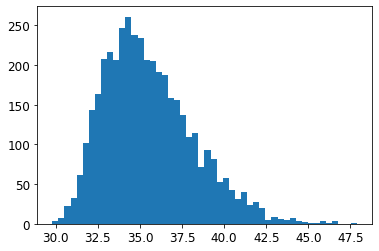

35.53733279720384


In [31]:
plt.hist(mass1,bins = 50) 
plt.show() 
print(np.mean(mass1))

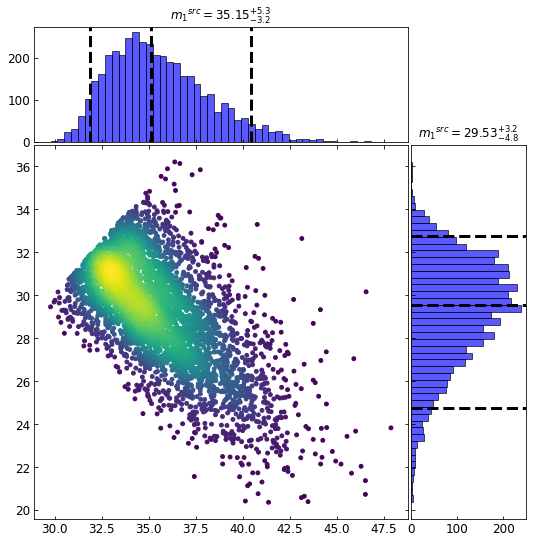

In [32]:
import numpy as np
import matplotlib.pyplot as plt


# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(figsize=(8, 8))
ax_scatter = plt.axes(rect_scatter)
ax_scatter.tick_params(direction='in', top=True, right=True)
ax_histx = plt.axes(rect_histx)
ax_histx.tick_params(direction='in', labelbottom=False)
ax_histy = plt.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False)

# the scatter plot: 
from scipy.stats import gaussian_kde

xy = np.vstack([mass1,mass2])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
mass1, mass2, z = mass1[idx], mass2[idx], z[idx]



ax_scatter.scatter(mass1, mass2,c = z,s=15)

# now determine nice limits by hand:
binwidth = 0.25
lim = np.ceil(np.abs([mass1, mass2]).max() / binwidth) * binwidth
# ax_scatter.set_xlim((0, lim))
# ax_scatter.set_ylim((0, lim))

bins = np.arange(0, lim + binwidth, binwidth)
ax_histx.hist(mass1, bins=50, color='b', edgecolor='k', alpha=0.65)
ax_histy.hist(mass2, bins=50, color='b', edgecolor='k', alpha=0.65,orientation = 'horizontal')

ax_histx.axvline(statistics.median(mass1), color='k', linestyle='dashed', linewidth=3)
ax_histx.axvline(np.percentile(mass1,5), color='k', linestyle='dashed', linewidth=3)
ax_histx.axvline(np.percentile(mass1,95), color='k', linestyle='dashed', linewidth=3)

ax_histy.axhline(y = statistics.median(mass2), color='k', linestyle='dashed', linewidth=3)
ax_histy.axhline(np.percentile(mass2,5), color='k', linestyle='dashed', linewidth=3)
ax_histy.axhline(np.percentile(mass2,95), color='k', linestyle='dashed', linewidth=3)

ax_histx.set_xlim(ax_scatter.get_xlim())
ax_histy.set_ylim(ax_scatter.get_ylim()) 

mass1_med = str(round(statistics.median(mass1),2)) 
mass2_med = str(round(statistics.median(mass2),2))

lower_mass1 = str(round(statistics.median(mass1) - np.percentile(mass1,5),1))
lower_mass2 = str(round(statistics.median(mass2) - np.percentile(mass2,5),1))

upper_mass1 = str(round(-(statistics.median(mass1) - np.percentile(mass1,95)),1))
upper_mass2 = str(round(-(statistics.median(mass2) - np.percentile(mass2,95)),1))

ax_histx.set_title('${m_1}^{src} = {' + mass1_med + '^{+' + upper_mass1 + '}_{-' + lower_mass1 + '}}}$')  
ax_histy.set_title('${m_1}^{src} = {' + mass2_med + '^{+' + upper_mass2 + '}_{-' + lower_mass2 + '}}}$')
plt.savefig('GW150914_srcmasses_combined_posteriors.png')
plt.show()